In [154]:
import requests
import json
from bs4 import BeautifulSoup as bs
import datetime
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
def next_page(i):    
    path = requests.get('https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=fantasy&sort=user_rating,desc&start='+str(i+1)+'&ref_=adv_nxt')
    soup = bs(path.content,'html.parser')
    movie_description = soup.find_all('div',class_='lister-item-content')
    m_name = []
    year_of_release = []
    genre = []
    Rating = []
    M_score = []
    short_desc = []
    votes = []
    gross = []
    cast = []
    director=[]
    for movie_desc in movie_description:
        m_name.append(movie_desc.a.text)
        yor = list(movie_desc.find('span',class_='lister-item-year text-muted unbold').text)
        year_of_release.append("".join(yor[1:len(yor)-1]))
        genre.append((movie_desc.find('span',class_='genre').text).strip('\n'))
        #print((movie_desc.find('div',class_='inline-block ratings-imdb-rating').text).strip('\n'))
        Rating.append((movie_desc.find('div',class_='inline-block ratings-imdb-rating').text).strip('\n'))
        short_desc.append((movie_desc.find_all('p',class_='text-muted')[1].text).strip('\n'))
        director.append((movie_desc.find_all('p',class_='')[0].text).strip('\n').strip('\t').split('|')[0].split(':')[1].strip('\n'))
        cast.append("".join((movie_desc.find_all('p',class_='')[0].text).strip('\n').strip('\t').split('|')[1].split(':')[1].strip('\n').split('\n')))
        votes.append((movie_desc.find('p',class_='sort-num_votes-visible').text.split('|')[0]).strip('\n').split('\n')[1])
    return [m_name,year_of_release,genre,Rating,short_desc,votes,director,cast]


In [152]:
# Enter n in multiple of 100.
def imdb_scrapping(n):   
    loop = []
    m_name = []
    year_of_release = []
    genre = []
    Rating = []
    M_score = []
    short_desc = []
    votes = []
    gross = []
    cast = []
    director=[]
    while n >= 50:
        loop.append(n)
        n -= 50
    path = requests.get('https://www.imdb.com/search/title/?genres=fantasy&sort=user_rating,desc&title_type=feature&num_votes=25000,')
    soup = bs(path.content,'html.parser')
    movie_description = soup.find_all('div',class_='lister-item-content')
    for movie_desc in movie_description:
        #print(movie_desc)
        m_name.append(movie_desc.a.text)
        yor = list(movie_desc.find('span',class_='lister-item-year text-muted unbold').text)
        year_of_release.append("".join(yor[1:len(yor)-1]))
        genre.append((movie_desc.find('span',class_='genre').text).strip('\n'))
        Rating.append((movie_desc.find('div',class_='inline-block ratings-imdb-rating').text).strip('\n'))
        short_desc.append((movie_desc.find_all('p',class_='text-muted')[1].text).strip('\n'))
        director.append((movie_desc.find_all('p',class_='')[0].text).strip('\n').strip('\t').split('|')[0].split(':')[1].strip('\n'))
        cast.append("".join((movie_desc.find_all('p',class_='')[0].text).strip('\n').strip('\t').split('|')[1].split(':')[1].strip('\n').split('\n')))
        votes.append((movie_desc.find('p',class_='sort-num_votes-visible').text.split('|')[0]).strip('\n').split('\n')[1])

    for i in loop:
        data = next_page(i)
        m_name += data[0]
        year_of_release += data[1]
        genre += data[2]
        Rating += data[3]
        short_desc += data[4]
        votes += data[5]
        director += data[6]
        cast += data[7]
    return [m_name,year_of_release,genre,Rating,short_desc,votes,director,cast]
data = imdb_scrapping(50)        


In [153]:
df = pd.DataFrame({'Name':data[0],'Year_of_Release':data[1],'Genre':data[2],'Rating':data[3],
                  'Votes':data[5],'Director':data[6],'cast':data[7], 'Short Description':data[4]})
print(df.shape)
df.head()

(100, 8)


,Name,Year_of_Release,Genre,Rating,Votes,Director,cast,Short Description
0,The Lord of the Rings: The Return of the King,2003,"Action, Adventure, Drama",8.9,"1,657,479",Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",Gandalf and Aragorn lead the World of Men ...
1,The Lord of the Rings: The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,"1,677,172",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",A meek Hobbit from the Shire and eight com...
2,The Lord of the Rings: The Two Towers,2002,"Action, Adventure, Drama",8.7,"1,498,836",Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",While Frodo and Sam edge closer to Mordor ...
3,Star Wars: Episode V - The Empire Strikes Back,1980,"Action, Adventure, Fantasy",8.7,"1,169,092",Irvin Kershner,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",After the Rebels are brutally overpowered ...
4,Sen to Chihiro no kamikakushi,2001,"Animation, Adventure, Family",8.6,"660,916",Hayao Miyazaki,"Daveigh Chase, Suzanne Pleshette, Miyu Irino, ...","During her family's move to the suburbs, a..."


In [149]:
#df.to_csv('imdb_fantasy.csv')

<h2><I>Plotting and pbserving number of fantasy movies releasing in a year.

<Figure size 720x720 with 0 Axes>

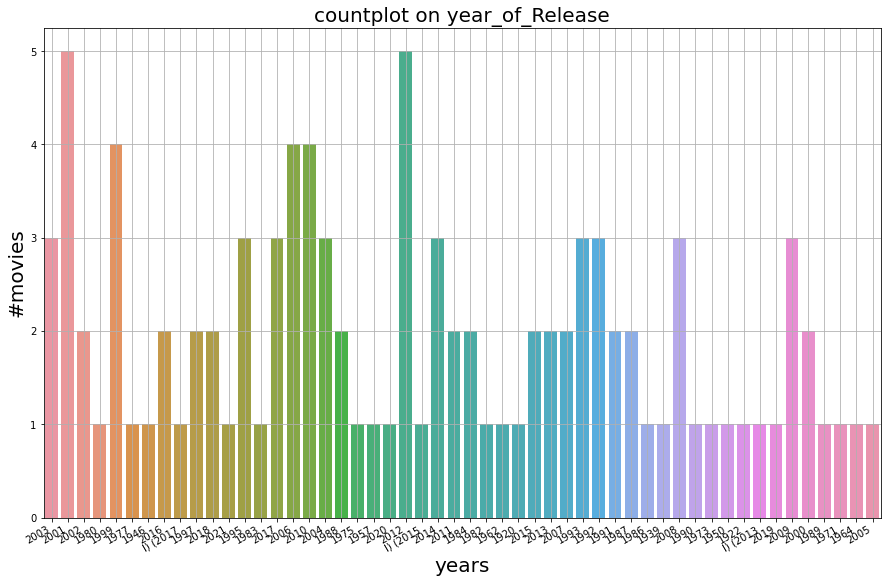

In [159]:
fig = plt.figure(figsize = (15,10))
plt.title('countplot on year_of_Release',fontsize=20)
sns.countplot(df['Year_of_Release'])
plt.xlabel('years',fontsize=20)
plt.ylabel('#movies',fontsize=20)
fig.autofmt_xdate()
plt.grid(b=True)
plt.show()


<h2><I>Plotting and pbserving the rating pattern.

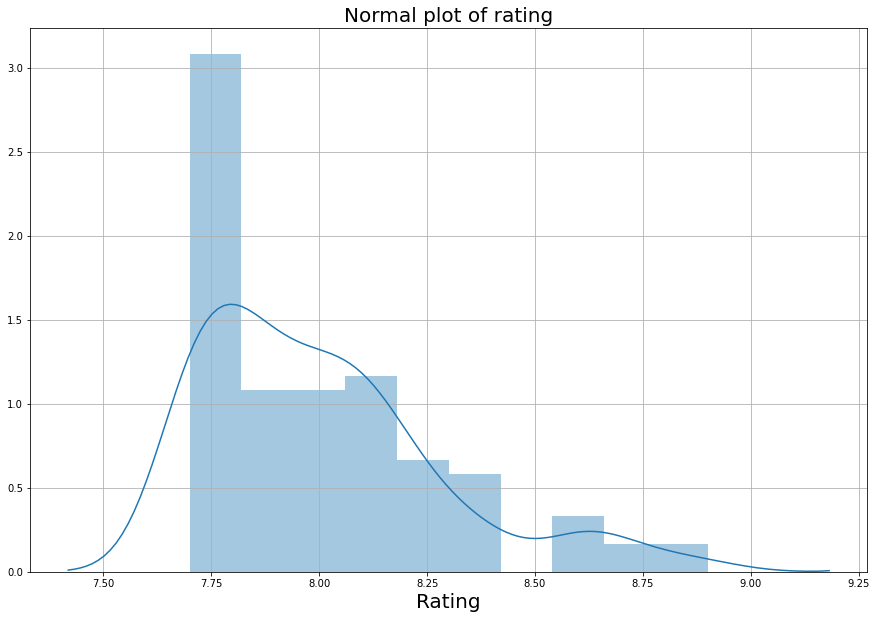

In [162]:
fig = plt.figure(figsize = (15,10))
plt.title('Normal plot of rating',fontsize=20)
sns.distplot(df['Rating'])
plt.xlabel('Rating',fontsize=20)
plt.grid(b=True)
plt.show()


<h2><I>Plotting and pbserving the Voting pattern.

In [165]:

df['Votes'] = [int("".join(i.split(','))) for i in df['Votes']]

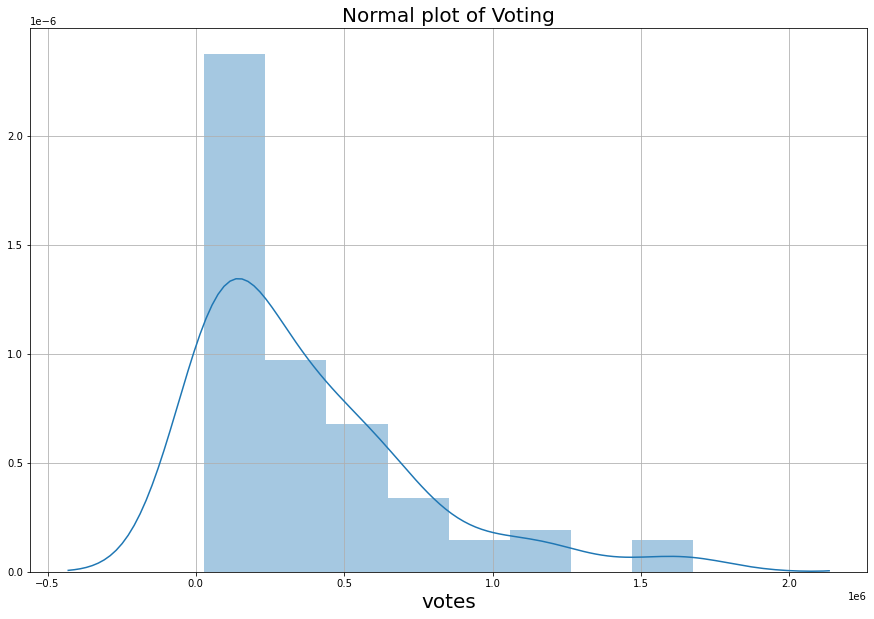

In [166]:
fig = plt.figure(figsize = (15,10))
plt.title('Normal plot of Voting',fontsize=20)
sns.distplot(df['Votes'])
plt.xlabel('votes',fontsize=20)
plt.grid(b=True)
plt.show()
